In [37]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from array import array
 

In [24]:
filename='iris.data'
names = ['sepal-length','sepal-width','petal-width','petal-length', 'class']
dataset = read_csv(filename, names=names)

In [25]:
print(dataset.shape)

(150, 5)


In [26]:
print(dataset.head)

<bound method NDFrame.head of      sepal-length  sepal-width  petal-width  petal-length           class
0             5.1          3.5          1.4           0.2     Iris-setosa
1             4.9          3.0          1.4           0.2     Iris-setosa
2             4.7          3.2          1.3           0.2     Iris-setosa
3             4.6          3.1          1.5           0.2     Iris-setosa
4             5.0          3.6          1.4           0.2     Iris-setosa
..            ...          ...          ...           ...             ...
145           6.7          3.0          5.2           2.3  Iris-virginica
146           6.3          2.5          5.0           1.9  Iris-virginica
147           6.5          3.0          5.2           2.0  Iris-virginica
148           6.2          3.4          5.4           2.3  Iris-virginica
149           5.9          3.0          5.1           1.8  Iris-virginica

[150 rows x 5 columns]>


In [27]:
print(dataset.describe())

       sepal-length  sepal-width  petal-width  petal-length
count    150.000000   150.000000   150.000000    150.000000
mean       5.843333     3.054000     3.758667      1.198667
std        0.828066     0.433594     1.764420      0.763161
min        4.300000     2.000000     1.000000      0.100000
25%        5.100000     2.800000     1.600000      0.300000
50%        5.800000     3.000000     4.350000      1.300000
75%        6.400000     3.300000     5.100000      1.800000
max        7.900000     4.400000     6.900000      2.500000


In [28]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


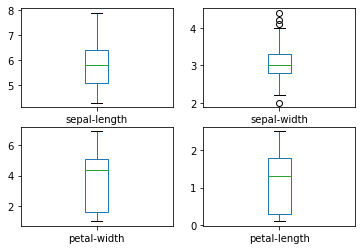

In [30]:
dataset.plot(kind='box', subplots=True, layout=(2,2),sharex=False, sharey=False,)
pyplot.show()

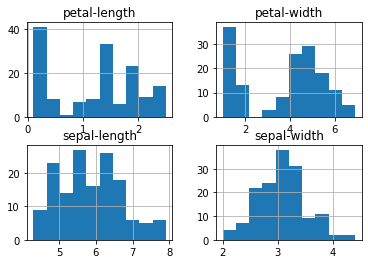

In [31]:
dataset.hist()
pyplot.show()


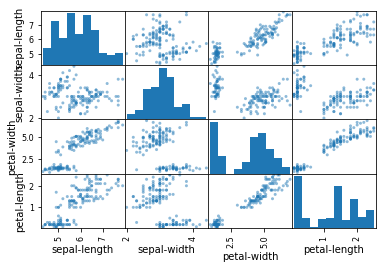

In [32]:
scatter_matrix(dataset)
pyplot.show()

In [45]:
array = dataset.values
x = array[:,0:4]
y = array[:,4]
validation_size = 0.20
seed = 7
x_train,x_validation,y_train , y_validation = train_test_split(x,y, test_size = validation_size, random_state = seed)

In [50]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10,random_state = None)
    cv_results = cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(),cv_results.std())
    print(msg)

/home/ramon/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/ramon/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

LR: 0.983333 (0.033333)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.983333 (0.033333)


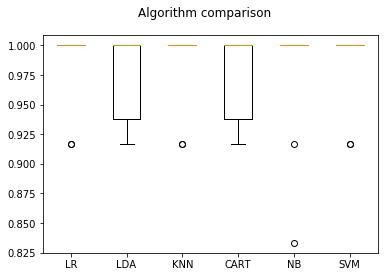

In [53]:
fig = pyplot.figure()
fig.suptitle('Algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()